![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 15 - Interpretability</center>
### <center> LIME <center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/15_Interpretability/MainELIandLIME.ipynb)

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [3]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

### Load the Titanic dataset:

In [4]:
from sklearn.datasets import fetch_openml

lClasses          = ['Died', 'Survived']
dData, vY         = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
dData['Survived'] = vY
dData.drop(columns=['name', 'ticket', 'cabin', 'boat', 'home.dest', 'body'], inplace=True)
dData

,pclass,sex,age,sibsp,parch,fare,embarked,Survived
0,1.0,female,29.0000,0.0,0.0,211.3375,S,1
1,1.0,male,0.9167,1.0,2.0,151.5500,S,1
2,1.0,female,2.0000,1.0,2.0,151.5500,S,0
3,1.0,male,30.0000,1.0,2.0,151.5500,S,0
4,1.0,female,25.0000,1.0,2.0,151.5500,S,0
...,...,...,...,...,...,...,...,...
1304,3.0,female,14.5000,1.0,0.0,14.4542,C,0
1305,3.0,female,NaN,1.0,0.0,14.4542,C,0
1306,3.0,male,26.5000,0.0,0.0,7.2250,C,0
1307,3.0,male,27.0000,0.0,0.0,7.2250,C,0


### Fill NaNs:
* Categorigal data can be filled with the most frequent value (mode).
* Numerical data can be filled with the median (or average).

In [5]:
#-- col : value
dNaNs = {
    'embarked' : dData['embarked'].mode()[0],
    'age'      : dData['age']     .median(),
    'fare'     : dData['fare']    .median(),
}

dData.fillna(value=dNaNs, inplace=True)
dData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   float64 
 1   sex       1309 non-null   category
 2   age       1309 non-null   float64 
 3   sibsp     1309 non-null   float64 
 4   parch     1309 non-null   float64 
 5   fare      1309 non-null   float64 
 6   embarked  1309 non-null   category
 7   Survived  1309 non-null   category
dtypes: category(3), float64(5)
memory usage: 55.4 KB


### Use dummy variables for categorical columns:

In [6]:
dData = pd.get_dummies(dData, drop_first=True)
dData

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,Survived_1
0,1.0,29.0000,0.0,0.0,211.3375,0,0,1,1
1,1.0,0.9167,1.0,2.0,151.5500,1,0,1,1
2,1.0,2.0000,1.0,2.0,151.5500,0,0,1,0
3,1.0,30.0000,1.0,2.0,151.5500,1,0,1,0
4,1.0,25.0000,1.0,2.0,151.5500,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1304,3.0,14.5000,1.0,0.0,14.4542,0,0,0,0
1305,3.0,28.0000,1.0,0.0,14.4542,0,0,0,0
1306,3.0,26.5000,0.0,0.0,7.2250,1,0,0,0
1307,3.0,27.0000,0.0,0.0,7.2250,1,0,0,0


### Interpret simple models (Tree and linear) with ELI5:

In [7]:
mX        = dData.drop(columns=['Survived_1']).values
vY        = dData['Survived_1'].values
lFeatures = list(dData.columns)[:-1]

In [8]:
from sklearn.tree         import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#-- Train tree:
oTree = DecisionTreeClassifier(max_depth=4).fit(mX, vY)
#-- Train logistic regression:
oLR   = LogisticRegression(max_iter=1000).fit(mX, vY)

print(f'Tree:                train accuracy = {100*oTree.score(mX, vY)}%')
print(f'Logistic regression: train accuracy = {100*oLR.  score(mX, vY)}%')

Tree:                train accuracy = 81.89457601222307%
Logistic regression: train accuracy = 78.99159663865547%


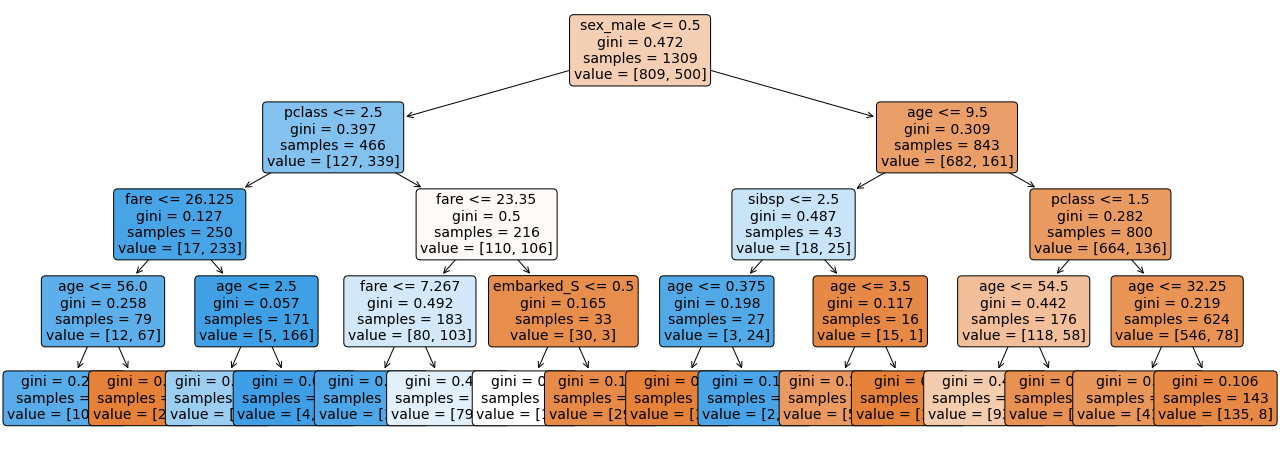

In [9]:
from sklearn.tree import plot_tree
_, ax = plt.subplots(figsize=(22, 8))
plot_tree(oTree, filled=True, rounded=True, fontsize=14, feature_names=lFeatures, ax=ax)
plt.show()

### ELI5

#### Tree feature importance using Mean Decrease in Impurity:

In [10]:
import eli5
eli5.show_weights(oTree, target_names=lClasses, feature_names=lFeatures)

C:\Users\Or\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Or\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.6063,sex_male
0.1987,pclass
0.0851,age
0.0593,fare
0.0482,sibsp
0.0025,embarked_S
0,embarked_Q
0,parch


### Linear feature importance based on the model's weights:

In [11]:
eli5.show_weights(oLR, target_names=lClasses, feature_names=lFeatures)

Weight?,Feature
+4.756,<BIAS>
+0.002,fare
-0.018,parch
-0.035,age
-0.300,sibsp
-0.457,embarked_Q
-0.560,embarked_S
-0.953,pclass
-2.529,sex_male


### LIME (on tabular data):

In [12]:
from lime.lime_tabular import LimeTabularExplainer

oLimeTable = LimeTabularExplainer(
    mX,
    discretize_continuous = True,
    feature_names         = lFeatures,
    class_names           = lClasses,
    verbose               = True
)

#### Choosing some instance:

In [13]:
idx = 4
dData.loc[idx,:]

pclass          1.00
age            25.00
sibsp           1.00
parch           2.00
fare          151.55
sex_male        0.00
embarked_Q      0.00
embarked_S      1.00
Survived_1      0.00
Name: 4, dtype: float64

In [16]:
vX   = mX[idx,:]
oExp = oLimeTable.explain_instance(vX, oLR.predict_proba)
oExp.show_in_notebook(show_table=True, show_all=True)

Intercept 0.11390173098544437
Prediction_local [0.81128988]
Right: 0.9053531401240437


### Train a Random Forest:

In [17]:
from sklearn.ensemble import RandomForestClassifier

oRF = RandomForestClassifier(oob_score=True).fit(mX, vY)
oRF.oob_score_

0.7914438502673797

In [18]:
oExp = oLimeTable.explain_instance(vX, oRF.predict_proba)
oExp.show_in_notebook(show_table=True, show_all=True)

Intercept 0.22327328042271413
Prediction_local [0.6968953]
Right: 0.29


### LIME on Images (with a pretrained DNN model)

In [20]:
#-- Import PyTorch:
import torch
import torch.nn.functional    as F
import torchvision
import torchvision.transforms as transforms
import json

#### Model and prediction function:

In [21]:
#-- Use a pretrained deep learning model:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
oModel = torchvision.models.resnet50(pretrained=True).eval()
oModel.to(device) #-- use GPU if available 

#-- model's labels:
dClasses = json.load(open('imagenet_class_index.json'))
lClasses = [dClasses[str(k)][1] for k in range(1000)]

#==================================================================================
#==================================================================================
#-- Model's prediction function:
vMean = np.array([0.48501961, 0.45795686, 0.40760392])
vStd  = np.array([0.22899216, 0.224     , 0.225     ])

def PredictBatch(lImages):
    #-- Transforms:
    oTransforms = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=vMean, std=vStd),
    ])

    #-- Predict images:
    oModel.eval()
    mX = torch.stack([oTransforms(mI) for mI in lImages], dim=0)
    mZ = oModel(mX.to(device))
    mP = F.softmax(mZ, dim=1)
    return mP.detach().cpu().numpy()

#### Load images:

In [22]:
#-- Load an image:
from PIL import Image
import urllib

def GetImageFromUrl(url):
    fileName = '__TempImage__.jpg'
    try:
        urllib.URLopener().retrieve(url, fileName)
    except:
        urllib.request.urlretrieve(url, fileName)
    
    oImage = Image.open(fileName)
    mI     = np.array(oImage)
    oImage.close()
    return mI

def GetImageFromPath(fileName):
    oImage = Image.open(fileName).convert('RGB')
    mI     = np.array(oImage)
    oImage.close()
    return mI

#-- Some images URL:
lUrls = [
    'https://farm3.static.flickr.com/2278/2096798034_bfe45b11ee.jpg',
    'https://static.flickr.com/48/116936482_7458bb78c1.jpg',
    'https://farm4.static.flickr.com/3001/2927732866_3bd24c2f98.jpg',
    'https://farm4.static.flickr.com/3018/2990729221_aabd592245.jpg',
    'https://farm4.static.flickr.com/3455/3372433349_0444709b8f.jpg',
    'https://i.huffpost.com/gen/3113902/thumbs/o-CAT-ON-LEASH-570.jpg?1',
    'https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Lynx_lynx_poing.jpg/220px-Lynx_lynx_poing.jpg'
]

#### Import LIME:

In [25]:
from lime                 import lime_image
from skimage.segmentation import mark_boundaries

oLimeImage = lime_image.LimeImageExplainer()

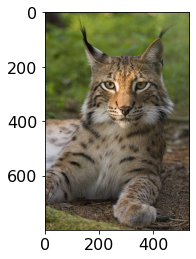

In [26]:
mI = GetImageFromPath('Lynx0001.jpg')
plt.imshow(mI)
plt.show()

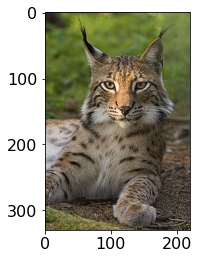

In [27]:
mI = GetImageFromUrl(lUrls[6])
plt.imshow(mI)
plt.show()

#### Apply LIME to image:

In [28]:
oExp = oLimeImage.explain_instance(mI, 
                                   PredictBatch,
                                   top_labels=5, 
                                   hide_color=0, 
                                   num_samples=2000)

#### Top 5 prediction:

In [29]:
[lClasses[ll] for ll in oExp.top_labels]

['lynx', 'leopard', 'snow_leopard', 'cheetah', 'Egyptian_cat']

### Show Explanation:

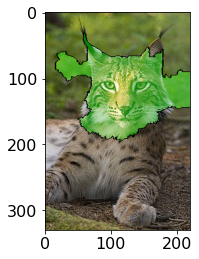

In [30]:
mLimeExp, mMask = oExp.get_image_and_mask(oExp.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
mLimeExp        = (.5 * mLimeExp + .5 * mI).astype(int)
mExpI           = mark_boundaries(mLimeExp/255.0, mMask, color=(0,0,0))
plt.imshow(mExpI)
plt.show()